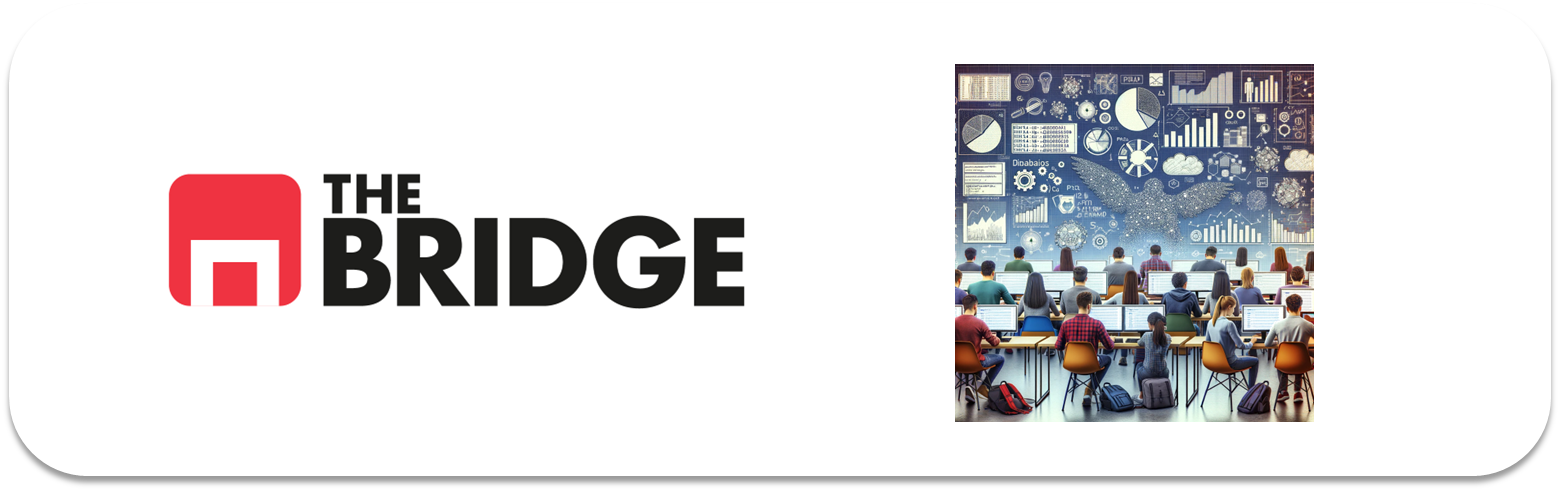

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



1. Carga el dataset del Titanic.

In [2]:
titanic_data = pd.read_csv("./data/titanic.csv")
titanic_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.

In [3]:
titanic_data = titanic_data.drop(columns=["class", "who", "adult_male", "deck", "embark_town", "alive", "alone"])
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [4]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7560\3544282899.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic_data, x="survived", palette="viridis")


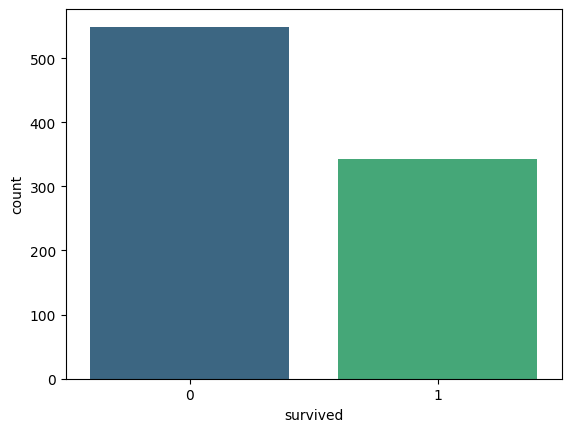

In [6]:
sns.countplot(data=titanic_data, x="survived", palette="viridis")
plt.show()

In [7]:
titanic_data["survived"].value_counts(normalize=True)*100

survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

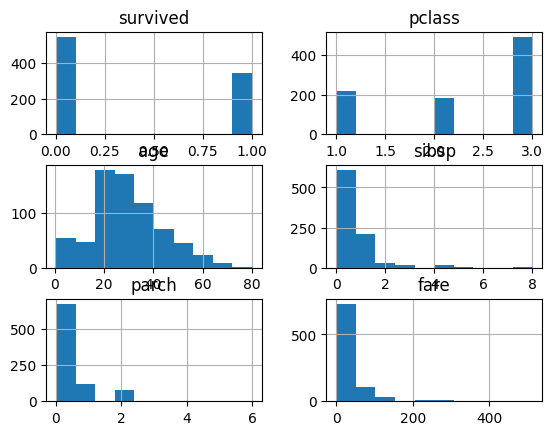

In [9]:
titanic_data.hist();

4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.

In [10]:
from sklearn.model_selection import train_test_split

X = titanic_data.drop(columns=["survived"])
y = titanic_data["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

train_class_distribution = y_train.value_counts(normalize=True)*100
test_class_distribution = y_test.value_counts(normalize=True)*100

train_class_distribution, test_class_distribution


(survived
 0    61.657303
 1    38.342697
 Name: proportion, dtype: float64,
 survived
 0    61.452514
 1    38.547486
 Name: proportion, dtype: float64)

5. Construye las parejas X,y de train y test.

In [11]:
# Verificar datos faltantes

missing_train = X_train.isnull().sum()
missing_test = X_test.isnull().sum()

train_shape = X_train.shape, y_train.shape
test_shape = X_test.shape, y_test.shape

missing_train, missing_test, train_shape, test_shape

(pclass        0
 sex           0
 age         137
 sibsp         0
 parch         0
 fare          0
 embarked      2
 dtype: int64,
 pclass       0
 sex          0
 age         40
 sibsp        0
 parch        0
 fare         0
 embarked     0
 dtype: int64,
 ((712, 7), (712,)),
 ((179, 7), (179,)))

6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.


In [12]:
X_train['age'] = X_train.groupby(['pclass', 'sex'])['age'].transform(lambda grp: grp.fillna(grp.median()))
X_test['age'] = X_test.groupby(['pclass', 'sex'])['age'].transform(lambda grp: grp.fillna(grp.median()))

most_frequent_embarked = X_train['embarked'].mode()[0]
X_train['embarked'] = X_train['embarked'].fillna(most_frequent_embarked)

missing_train_after = X_train.isnull().sum()
missing_test_after = X_test.isnull().sum()

missing_train_after, missing_test_after

(pclass      0
 sex         0
 age         0
 sibsp       0
 parch       0
 fare        0
 embarked    0
 dtype: int64,
 pclass      0
 sex         0
 age         0
 sibsp       0
 parch       0
 fare        0
 embarked    0
 dtype: int64)

7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.


In [16]:
# Convertir 'sex' a una columna binaria (0: female, 1: male)
X_train['sex'] = X_train['sex'].map({'female': 0, 'male': 1})
X_test['sex'] = X_test['sex'].map({'female': 0, 'male': 1})

# Convertir 'embarked' a una columna categórica codificada (0: S, 1: C, 2: Q)
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
X_train["embarked"] = X_train["embarked"].map(embarked_mapping)
X_test["embarked"] = X_test["embarked"].map(embarked_mapping)

X_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked
692,3,1,26.0,0,0,56.4958,0
481,2,1,30.0,0,0,0.0000,0
527,1,1,40.0,0,0,221.7792,0
855,3,0,18.0,0,1,9.3500,0
801,2,0,31.0,1,1,26.2500,0


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

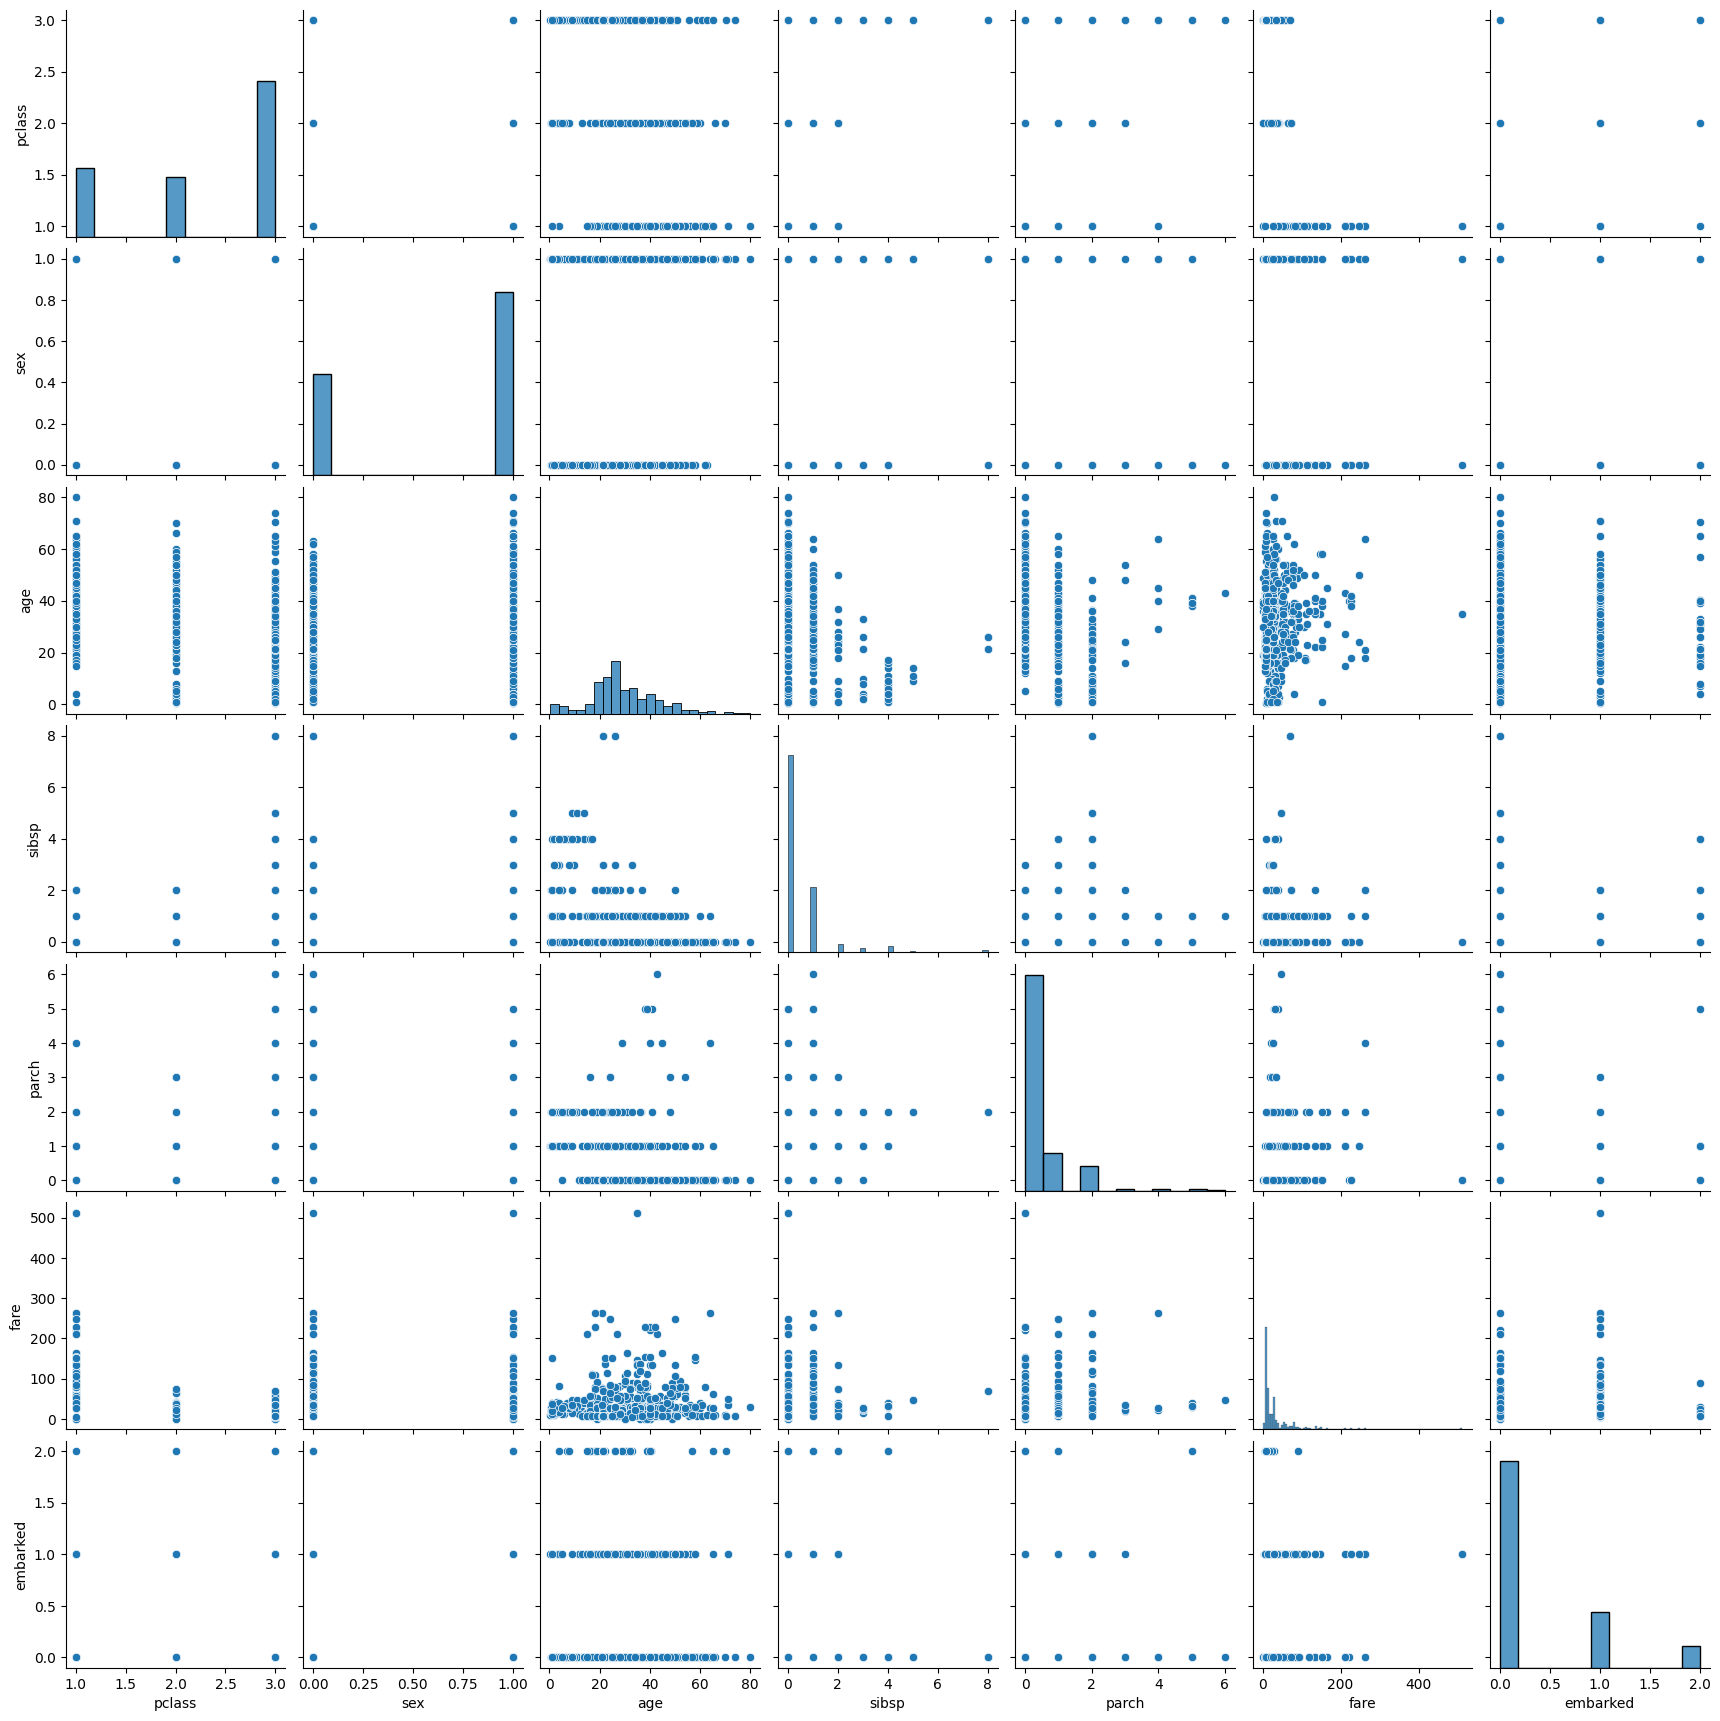

In [19]:
sns.pairplot(data=X_train, palette="viridis");

8. Trata las variables para que funcionen lo mejor posible en el modelo.


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Crear un modelo de regresión logística
logistic_model = LogisticRegression(random_state=42,max_iter=1000)

# Ajustar el modelo a los datos de entrenamiento
logistic_model.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred = logistic_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, classification_rep, conf_matrix

(0.8156424581005587,
 '              precision    recall  f1-score   support\n\n           0       0.82      0.89      0.86       110\n           1       0.80      0.70      0.74        69\n\n    accuracy                           0.82       179\n   macro avg       0.81      0.79      0.80       179\nweighted avg       0.81      0.82      0.81       179\n',
 array([[98, 12],
        [21, 48]]))

9. Construye un modelo de regresión logística.


In [23]:
from sklearn.model_selection import GridSearchCV

# Definir hiperparámetros
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100], # Control de regularizacion
    "penalty": ["l1", "l2"], # Tipo de regularizacion
    "solver": ["liblinear"] # Solver necesario para regularizacion l1
}

# Configurar la busqueda de cuadricula con validacion cruzada
grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42, max_iter=1000), param_grid=param_grid, scoring="accuracy", cv=5, verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

Fitting 5 folds for each of 10 candidates, totalling 50 fits


({'C': 1, 'penalty': 'l1', 'solver': 'liblinear'},
 np.float64(0.8006303555599331))

In [27]:
optimized_model = LogisticRegression(
    C=best_params['C'],
    penalty=best_params['penalty'],
    solver=best_params['solver'],
    random_state=42,
    max_iter=1000
)

# Ajustar el modelo al conjunto de entrenamiento
optimized_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_optimized = optimized_model.predict(X_test)

# Evaluar el modelo optimizado
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
classification_report_optimized = classification_report(y_test, y_pred_optimized)
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)

accuracy_optimized, classification_report_optimized, conf_matrix_optimized

(0.8156424581005587,
 '              precision    recall  f1-score   support\n\n           0       0.82      0.89      0.86       110\n           1       0.80      0.70      0.74        69\n\n    accuracy                           0.82       179\n   macro avg       0.81      0.79      0.80       179\nweighted avg       0.81      0.82      0.81       179\n',
 array([[98, 12],
        [21, 48]]))

10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.


In [29]:
# Obtener los coeficientes del modelo optimizado
coefficients = optimized_model.coef_[0]
features = X_train.columns

# Crear un DataFrame con las características y sus coeficientes
coeff_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Mostrar los coeficientes en un DataFrame
coeff_df

,Feature,Coefficient
6,embarked,0.303629
5,fare,0.002765
2,age,-0.039849
4,parch,-0.063069
3,sibsp,-0.255855
0,pclass,-1.120048
1,sex,-2.545500


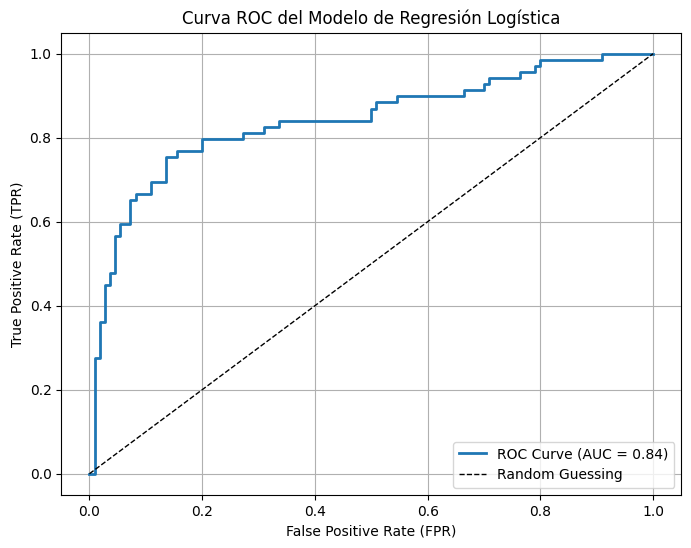

np.float64(0.8420289855072463)

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = optimized_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing', linewidth=1)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC del Modelo de Regresión Logística')
plt.legend(loc='lower right')
plt.grid()
plt.show()

auc_score

11. Procesa el dataset de Test para que puedas usarlo en la evaluación 


12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.


13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.


14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  
